<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   sex      202 non-null    category
 1   age      202 non-null    int64   
 2   HR       202 non-null    int64   
 3   PR int   202 non-null    int64   
 4   QRS dur  202 non-null    int64   
 5   QTc      202 non-null    int64   
 6   QTd      202 non-null    int64   
 7   TpTe     202 non-null    int64   
 8   TpTe/QT  202 non-null    float64 
 9   Target   202 non-null    category
dtypes: category(2), float64(1), int64(7)
memory usage: 13.4 KB


/Users/saeed/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/saeed/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/saeed/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/saeed/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/saeed/tensorflow-test/env/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update 

There are 141 samples in the training set and 61 samples in the test set

Logistic Regression -  0.8032786885245902
SVM -  0.819672131147541
Naive bayes -  0.8032786885245902
Decision Tree -  0.8032786885245902
Random Forest -  0.8032786885245902
knn -  0.7540983606557377
xgboost -  0.8032786885245902
[0.06016236 0.03345346 0.07073527 0.05389267 0.16158698 0.29407048
 0.21085134 0.11524739]


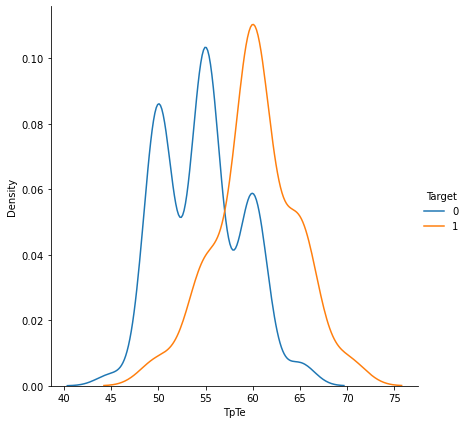

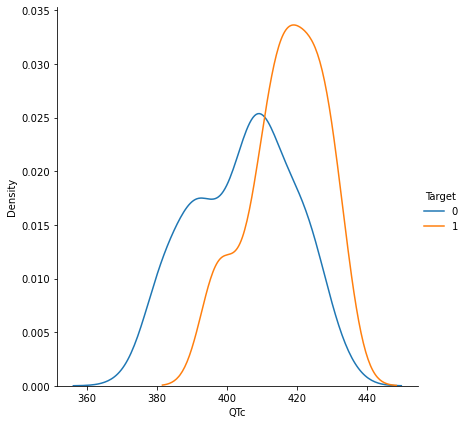

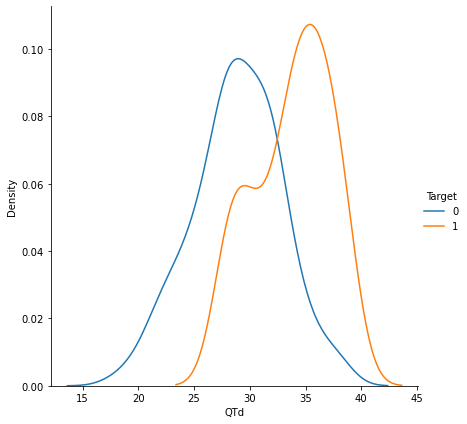

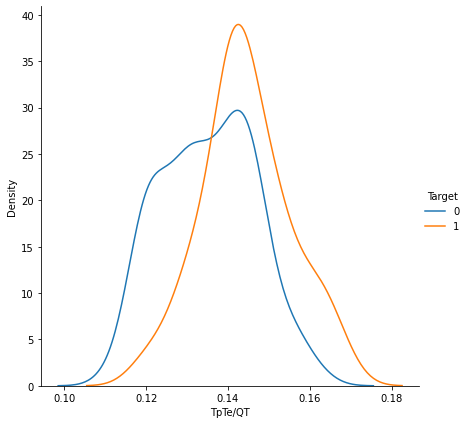

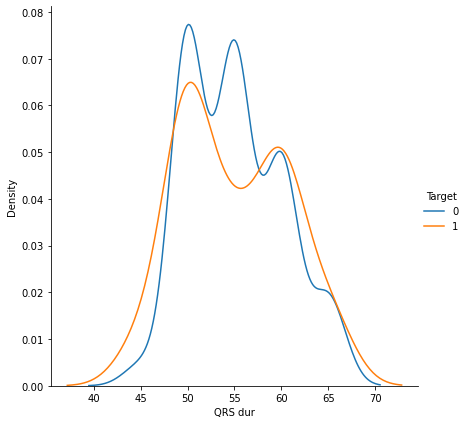

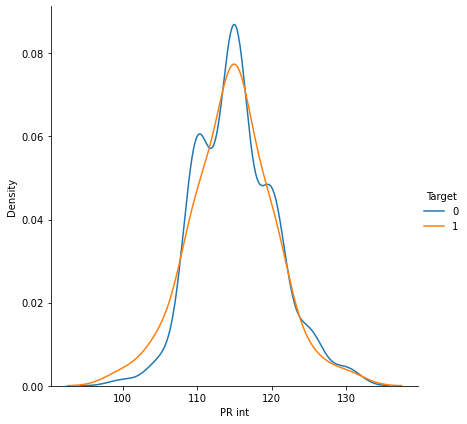

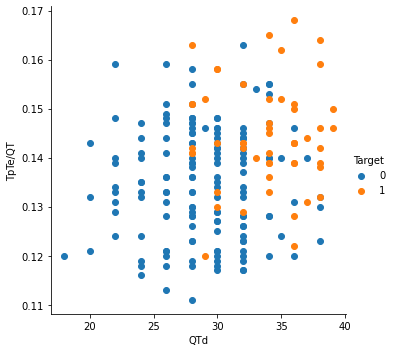

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
import xgboost as xgb

df = pd.read_csv('/Users/saeed/Desktop/Ongoing Works/Pediatrics/P.csv', skiprows=0)

df['sex'] = df['sex'].astype('category')
df['Target'] = df['Target'].astype('category')

X = df.drop(['Target','sex'], axis=1)
y = df['Target']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

df.info()

ax = sns.FacetGrid(df, hue="Target", size=6).map(sns.kdeplot, "TpTe").add_legend()
ax = sns.FacetGrid(df, hue="Target", size=6).map(sns.kdeplot, "QTc").add_legend()
ax = sns.FacetGrid(df, hue="Target", size=6).map(sns.kdeplot, "QTd").add_legend()
ax = sns.FacetGrid(df, hue="Target", size=6).map(sns.kdeplot, "TpTe/QT").add_legend()
ax = sns.FacetGrid(df, hue="Target", size=6).map(sns.kdeplot, "QRS dur").add_legend()
ax = sns.FacetGrid(df, hue="Target", size=6).map(sns.kdeplot, "PR int").add_legend()

sns.FacetGrid(df, hue="Target", size=5) \
   .map(plt.scatter,"QTd","TpTe/QT") \
   .add_legend()
   
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()


lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_predict = lr_model.predict(X_test)
print('Logistic Regression - ',accuracy_score(lr_predict,y_test))


svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)
svc_predict = svm_model.predict(X_test)
print('SVM - ',accuracy_score(svc_predict,y_test))


nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_predict = nb_model.predict(X_test)
print('Naive bayes - ',accuracy_score(nb_predict,y_test))


dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(X_train,y_train)
dt_predict = dt_model.predict(X_test)
print('Decision Tree - ',accuracy_score(dt_predict,y_test))


rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(X_train,y_train)
rfc_predict = rfc_model.predict(X_test)
print('Random Forest - ',accuracy_score(rfc_predict,y_test))


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)
print('knn - ',accuracy_score(knn_predict,y_test))


xg_model = xgb.XGBClassifier()
xg_model = xg_model.fit(X_train,y_train)
xg_predict = xg_model.predict(X_test)
print('xgboost - ', accuracy_score(xg_predict,y_test))

print(xg_model.feature_importances_)